# 좋은 데이터의 기준

* 완결성 : 필수적인 데이터는 모두 기록되어 있어야함
* 유일성 : 동일한 데이터가 불필요하게 중복되면 안된다.
* 통일성 : 데이터가 동일한 형식으로 저장되어 있어야 한다.
* 정확성 : 주로 데이터를 모으는 과정에서 발생, 동일한 기준에서 수집, 작성되어야 한다.

* 결측값 : 없는것이 중요하고, 자주 발생한다면 원인을 찾아야 한다.

## 데이터 클리닝 - 완결성 pt.1

In [3]:
import pandas as pd
df = pd.read_csv('data/attendance.csv')

In [4]:
df

,연도,야구,축구,배구,남자농구,여자농구
0,2008,10881,11642,1253.0,4208,1329
1,2009,11562,10983,1471.0,4152,1206
2,2010,11402,12873,NaN,3870,705
3,2011,13055,10709,1774.0,3955,1445
4,2012,13747,7157,NaN,4537,1150
5,2013,11373,7656,NaN,4092,1237
6,2014,11429,8115,1967.0,4458,1417
7,2015,10357,7720,2311.0,3953,1480
8,2016,11583,7854,2336.0,3543,1425
9,2017,11668,6502,2425.0,3188,1097


In [5]:
df.isnull() # 하면 결측값이 있던 위치에만 True 가 산출된다.

,연도,야구,축구,배구,남자농구,여자농구
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,True,False,False
3,False,False,False,False,False,False
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [6]:
df.isnull().sum()

연도      0
야구      0
축구      0
배구      3
남자농구    0
여자농구    0
dtype: int64

위 과정을 통해서 각 컬럼별로 결측값이 몇개나 존재하는지 쉽게 확인할 수 있다.

## 데이터 클리닝: 완결성 pt.2

In [12]:
import pandas as pd
df = pd.read_csv('data/attendance.csv')

In [8]:
df

,연도,야구,축구,배구,남자농구,여자농구
0,2008,10881,11642,1253.0,4208,1329
1,2009,11562,10983,1471.0,4152,1206
2,2010,11402,12873,NaN,3870,705
3,2011,13055,10709,1774.0,3955,1445
4,2012,13747,7157,NaN,4537,1150
5,2013,11373,7656,NaN,4092,1237
6,2014,11429,8115,1967.0,4458,1417
7,2015,10357,7720,2311.0,3953,1480
8,2016,11583,7854,2336.0,3543,1425
9,2017,11668,6502,2425.0,3188,1097


In [9]:
df.dropna()

,연도,야구,축구,배구,남자농구,여자농구
0,2008,10881,11642,1253.0,4208,1329
1,2009,11562,10983,1471.0,4152,1206
3,2011,13055,10709,1774.0,3955,1445
6,2014,11429,8115,1967.0,4458,1417
7,2015,10357,7720,2311.0,3953,1480
8,2016,11583,7854,2336.0,3543,1425
9,2017,11668,6502,2425.0,3188,1097


``dropna()``를 사용하면 결측값이 포함되어 있던 row를 빼고 분석할 수 있다.

In [11]:
df.dropna(inplace = True)

In [16]:
df.dropna(axis = 'columns')  # NA가 있는 컬럼만 제외하는 방법도 있다.

,연도,야구,축구,남자농구,여자농구
0,2008,10881,11642,4208,1329
1,2009,11562,10983,4152,1206
2,2010,11402,12873,3870,705
3,2011,13055,10709,3955,1445
4,2012,13747,7157,4537,1150
5,2013,11373,7656,4092,1237
6,2014,11429,8115,4458,1417
7,2015,10357,7720,3953,1480
8,2016,11583,7854,3543,1425
9,2017,11668,6502,3188,1097


있는 데이터를 활용하여면 결측값을 어떻게 해줘야하는데

첫 번쨰 방법은 특정 값을 입력해주는 것이다.

In [17]:
df.fillna(0)

,연도,야구,축구,배구,남자농구,여자농구
0,2008,10881,11642,1253.0,4208,1329
1,2009,11562,10983,1471.0,4152,1206
2,2010,11402,12873,0.0,3870,705
3,2011,13055,10709,1774.0,3955,1445
4,2012,13747,7157,0.0,4537,1150
5,2013,11373,7656,0.0,4092,1237
6,2014,11429,8115,1967.0,4458,1417
7,2015,10357,7720,2311.0,3953,1480
8,2016,11583,7854,2336.0,3543,1425
9,2017,11668,6502,2425.0,3188,1097


In [18]:
df.mean()

연도       2012.500000
야구      11705.700000
축구       9121.100000
배구       1933.857143
남자농구     3995.600000
여자농구     1249.100000
dtype: float64

In [19]:
df.fillna(df.mean())  # 결측값을 해당 컬럼의 평균값으로 바꿔준다.

,연도,야구,축구,배구,남자농구,여자농구
0,2008,10881,11642,1253.000000,4208,1329
1,2009,11562,10983,1471.000000,4152,1206
2,2010,11402,12873,1933.857143,3870,705
3,2011,13055,10709,1774.000000,3955,1445
4,2012,13747,7157,1933.857143,4537,1150
5,2013,11373,7656,1933.857143,4092,1237
6,2014,11429,8115,1967.000000,4458,1417
7,2015,10357,7720,2311.000000,3953,1480
8,2016,11583,7854,2336.000000,3543,1425
9,2017,11668,6502,2425.000000,3188,1097


In [21]:
df.fillna(df.median()) # 결측값을 해당 컬럼의 중간값으로 바꿔준다

,연도,야구,축구,배구,남자농구,여자농구
0,2008,10881,11642,1253.0,4208,1329
1,2009,11562,10983,1471.0,4152,1206
2,2010,11402,12873,1967.0,3870,705
3,2011,13055,10709,1774.0,3955,1445
4,2012,13747,7157,1967.0,4537,1150
5,2013,11373,7656,1967.0,4092,1237
6,2014,11429,8115,1967.0,4458,1417
7,2015,10357,7720,2311.0,3953,1480
8,2016,11583,7854,2336.0,3543,1425
9,2017,11668,6502,2425.0,3188,1097


## 스팀 게임 데이터 정리하기

스팀 플랫폼에서 가장 반응이 좋은 게임을 알아보려 한다.

결측값이 있는 row를 삭제하고 DataFrame을 출력하라

In [23]:
import pandas as pd

df = pd.read_csv('data/steam_1.csv')

In [25]:
df.isnull().sum()  # 먼저 데이터에 결측값이 존재하는지, 얼마나 있는지 확인하자

Name      0
Hours    10
dtype: int64

In [28]:
df.dropna(inplace=True)
df

,Name,Hours
0,The Elder Scrolls V Skyrim,273.0
1,Fallout 4,87.0
2,Spore,14.9
3,Fallout New Vegas,12.1
4,Left 4 Dead 2,8.9
...,...,...
20221,Nancy Drew Tomb of the Lost Queen,8.4
20222,Portal 2,8.3
20223,Farm for your Life,8.0
20224,PAYDAY 2,7.5


## 데이터 클리닝 : 유일성

In [1]:
import pandas as pd
df = pd.read_csv('data/dust.csv', index_col = 0)
df.head()

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18


중복되는 row가 있다는 것은 중복되는 날짜가 있다는 것

In [3]:
df.index.value_counts()

07월 31일    2
07월 20일    1
08월 09일    1
08월 06일    1
07월 24일    1
07월 22일    1
07월 25일    1
07월 19일    1
08월 03일    1
07월 23일    1
07월 13일    1
08월 11일    1
07월 15일    1
08월 07일    1
07월 30일    1
08월 01일    1
07월 18일    1
07월 14일    1
07월 29일    1
07월 17일    1
07월 27일    1
08월 10일    1
07월 21일    1
07월 28일    1
08월 08일    1
07월 26일    1
07월 16일    1
08월 04일    1
08월 05일    1
08월 02일    1
Name: 날짜, dtype: int64

In [4]:
df.loc['07월 31일']

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19


중복된 row를 삭제하려면 ``duplicates()``를 붙여주면 된다.

하지만 ``duplicates()``는 새로운 DataFrame을 만들어버리기 때문에 ``inplace = True``를 넣어주어야 한다.

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24,22
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22,25
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27,39
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26,33


``(DataFrame).T``하면 row와 column이 서로 바뀐다.

In [10]:
df.T

날짜,08월 11일,08월 10일,08월 09일,08월 08일,08월 07일,08월 06일,08월 05일,08월 04일,08월 03일,08월 02일,...,07월 22일,07월 21일,07월 20일,07월 19일,07월 18일,07월 17일,07월 16일,07월 15일,07월 14일,07월 13일
서울,7,15,24,26,20,31,27,27,44,40,...,30,37,36,30,35,30,26,22,20,21
부산,17,25,26,25,26,39,36,36,32,26,...,28,37,70,76,55,56,48,49,46,43
대구,15,15,26,28,22,29,25,26,23,20,...,20,41,56,54,42,49,42,21,26,29
인천,10,20,27,26,25,35,31,31,47,41,...,30,30,27,29,36,32,24,22,22,19
광주,29,28,27,29,33,27,27,27,29,26,...,21,48,46,36,39,38,37,23,24,23
대전,12,25,27,31,24,31,24,27,28,19,...,40,57,44,40,42,36,30,18,17,19
울산,12,17,22,20,18,31,30,32,29,20,...,26,42,77,81,66,65,59,55,54,47
경기,9,20,27,26,23,30,27,31,44,39,...,34,38,36,32,36,32,28,23,21,21
강원,16,16,25,29,18,22,25,39,33,25,...,44,51,44,40,39,44,36,25,26,24
충북,14,25,32,33,23,33,31,36,31,24,...,48,59,51,47,47,43,38,24,23,24


In [14]:
df.T.drop_duplicates()

날짜,08월 11일,08월 10일,08월 09일,08월 08일,08월 07일,08월 06일,08월 05일,08월 04일,08월 03일,08월 02일,...,07월 22일,07월 21일,07월 20일,07월 19일,07월 18일,07월 17일,07월 16일,07월 15일,07월 14일,07월 13일
서울,7,15,24,26,20,31,27,27,44,40,...,30,37,36,30,35,30,26,22,20,21
부산,17,25,26,25,26,39,36,36,32,26,...,28,37,70,76,55,56,48,49,46,43
대구,15,15,26,28,22,29,25,26,23,20,...,20,41,56,54,42,49,42,21,26,29
인천,10,20,27,26,25,35,31,31,47,41,...,30,30,27,29,36,32,24,22,22,19
광주,29,28,27,29,33,27,27,27,29,26,...,21,48,46,36,39,38,37,23,24,23
대전,12,25,27,31,24,31,24,27,28,19,...,40,57,44,40,42,36,30,18,17,19
울산,12,17,22,20,18,31,30,32,29,20,...,26,42,77,81,66,65,59,55,54,47
경기,9,20,27,26,23,30,27,31,44,39,...,34,38,36,32,36,32,28,23,21,21
강원,16,16,25,29,18,22,25,39,33,25,...,44,51,44,40,39,44,36,25,26,24
충북,14,25,32,33,23,33,31,36,31,24,...,48,59,51,47,47,43,38,24,23,24


In [15]:
df.T.drop_duplicates().T

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26


## 데이터클리닝: 정확성 pt.1

**이상점(Outlier)** : 다른 값들과 너무 동떨어져 있는 데이터 또는 부정확한 데이터?

* 이상점을 판단하는 기준?

Box plot을 볼 때 박스 안(Q1 ~ Q3사의의 구간)은 IQR(interquatile Range)이라고 일컫는다
* 25% 지점에서 1.5 * IQR 벗어나면 이상점으로 보고
* 75% 지점에서 1.5 * IQR 벗어나면 또 이상점으로 본다

**이상점은 어떻게?**
* 정보를 고치거나
* 삭제해야 한다(분석에 방해가 된다면) 단, 의미있는 정보라면 그냥 둘 수 있다.


## 데이터클리닝: 정확성 pt.2

In [18]:
import pandas as pd
df = pd.read_csv('data/beer.csv', index_col= 0)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0


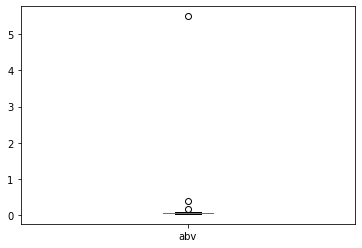

In [21]:
df.plot(kind= 'box', y = 'abv')

In [22]:
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [24]:
df['abv'].quantile(0.75) 

0.065

In [25]:
df['abv'].quantile(0.25)

0.05

In [26]:
q1 = df['abv'].quantile(0.25)
q3 = df['abv'].quantile(0.75)
iqr = q3 - q1

In [28]:
condition = (df['abv'] < q1 - 1.5 * iqr) |(df['abv'] > q3 + 1.5 * iqr)

In [29]:
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [30]:
df.loc[2250, 'abv'] = 0.055

In [31]:
df.loc[2250]

abv                             0.055
ibu                                40
id                                145
name              Silverback Pale Ale
style         American Pale Ale (APA)
brewery_id                        424
ounces                             12
Name: 2250, dtype: object

In [33]:
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [34]:
df[condition].index

Int64Index([963, 1856], dtype='int64')

In [35]:
df.drop(df[condition].index, inplace =True)

In [36]:
df[condition]

C:\Users\totti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,abv,ibu,id,name,style,brewery_id,ounces


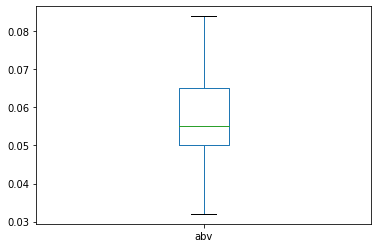

In [37]:
df.plot(kind = 'box', y = 'abv')

## 데이터 클리닝 : 정확성 pt.3

* **관계적 이상점(Relational Outlier)** 두 변수의 관계를 고려했을 때 이상한 데이터

In [38]:
%matplotlib inline
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/exam_outlier.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


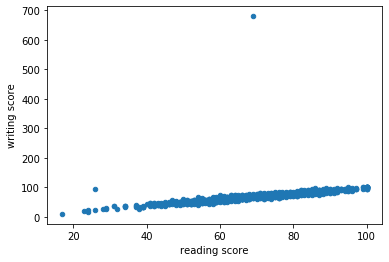

In [39]:
df.plot(kind='scatter', x = 'reading score', y= 'writing score')

In [41]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.810412,0.513623
reading score,0.810412,1.000000,0.582378
writing score,0.513623,0.582378,1.000000


In [42]:
df['writing score'] >100

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: writing score, Length: 1000, dtype: bool

In [43]:
df[df['writing score'] >100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,male,group E,associate's degree,free/reduced,completed,77,69,680


In [45]:
df.drop(51, inplace=True)

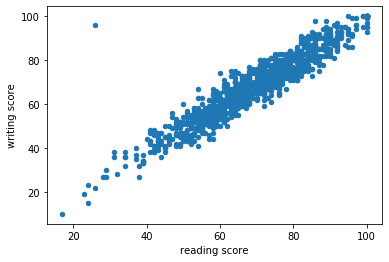

In [46]:
df.plot(kind='scatter', x = 'reading score', y= 'writing score')

In [49]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.810627,0.802853
reading score,0.810627,1.000000,0.943248
writing score,0.802853,0.943248,1.000000


In [50]:
cond = (df['writing score'] > 90) & (df['reading score'] < 40)

In [51]:
df[cond]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
373,female,group D,some college,standard,completed,82,26,96


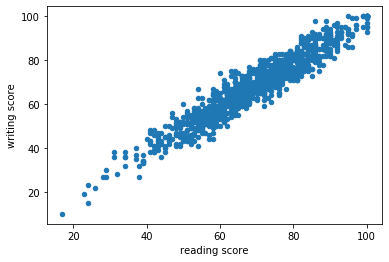

In [52]:
df.drop(373, inplace =True)
df.plot(kind='scatter', x = 'reading score', y= 'writing score')

In [53]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817735,0.802722
reading score,0.817735,1.000000,0.954440
writing score,0.802722,0.954440,1.000000


## 영화 평점 분석하기 pt.1

In [2]:
import pandas as pd

df = pd.read_csv('data/movie_metadata.csv')
df.head()

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,English,USA,237000000.0,7.9,33000,4834
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,300000000.0,7.1,0,48350
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,245000000.0,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,250000000.0,8.5,164000,106759
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,7.1,0,143


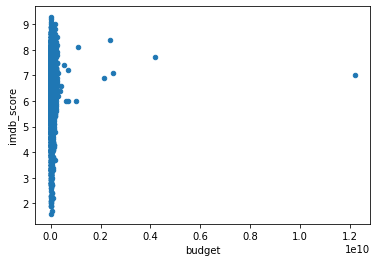

In [56]:
df.plot(kind='scatter', x='budget', y= 'imdb_score')

산점도를 그려봤더니 아주 큰 예산을 쓴 영화 몇 개 때문에 상관계수 파악이 어렵다.

예산을 기준으로 75% 지점에서 5 IQR 만큼 큰 예산의 영화를 제거하고 산점도를 다시 그려라

In [3]:
q3 = df['budget'].quantile(0.75)
q1 = df['budget'].quantile(0.25)
iqr = q3 - q1

In [4]:
cond = df['budget'] > q3 + 5 * iqr  # 예산의 75% 지점을 q3로 지정하고 이보다 5 iqr 이상 큰 예산의 영화를 찾는다

In [15]:
df.drop(df[cond].index, inplace = True) # 위에서 찾는 영화의 row 리스트를 가지고  df를 인덱싱하여 그들은 drop한다.
df

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,English,USA,237000000.0,7.9,33000,4834
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,7.1,0,143
11,Superman Returns,2006.0,Action|Adventure|Sci-Fi,Bryan Singer,Kevin Spacey,Marlon Brando,Frank Langella,English,USA,209000000.0,6.1,0,29991
12,Quantum of Solace,2008.0,Action|Adventure,Marc Forster,Giancarlo Giannini,Mathieu Amalric,Rory Kinnear,English,UK,200000000.0,6.7,0,2023
13,Pirates of the Caribbean: Dead Man's Chest,2006.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,225000000.0,7.3,5000,48486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,2013.0,Comedy|Drama,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,English,Canada,NaN,7.7,84,2283
5039,The Following,NaN,Crime|Drama|Mystery|Thriller,NaN,Natalie Zea,Valorie Curry,Sam Underwood,English,USA,NaN,7.5,32000,1753
5040,A Plague So Pleasant,2013.0,Drama|Horror|Thriller,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,English,USA,1400.0,6.3,16,0
5041,Shanghai Calling,2012.0,Comedy|Drama|Romance,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,English,USA,NaN,6.3,660,2386


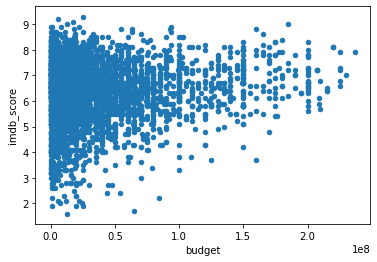

In [17]:
df.plot(kind='scatter', x='budget', y='imdb_score')

## 영화 평점 분석하기 pt.2

영화 평점 데이터에서 예산이 가장 높은 15개 영화를 제거하고, 산점도 그리기

In [18]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/movie_metadata.csv')

In [27]:
df.sort_values(by= 'budget', ascending=False, inplace = True)
cond = df.head(15)

In [29]:
df.drop(cond.index, inplace = True)
df

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
5,John Carter,2012.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,English,USA,263700000.0,6.6,24000,1873
7,Tangled,2010.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,English,USA,260000000.0,7.8,29000,2036
3461,Spider-Man 3,2007.0,Action|Adventure|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,English,USA,258000000.0,6.2,0,46055
6,Spider-Man 3,2007.0,Action|Adventure|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,English,USA,258000000.0,6.2,0,46055
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,250000000.0,8.5,164000,106759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,On the Downlow,2004.0,Drama,Tadeo Garcia,Tatiana Suarez-Pico,Michael Cortez,Eric Ambriz,English,USA,NaN,6.1,22,62
5032,Bang,1995.0,Crime|Drama,Ash Baron-Cohen,Peter Greene,Stanley B. Herman,James Noble,English,USA,NaN,6.4,20,1186
5038,Signed Sealed Delivered,2013.0,Comedy|Drama,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,English,Canada,NaN,7.7,84,2283
5039,The Following,NaN,Crime|Drama|Mystery|Thriller,NaN,Natalie Zea,Valorie Curry,Sam Underwood,English,USA,NaN,7.5,32000,1753


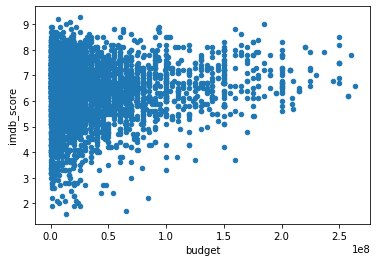

In [30]:
df.plot(kind='scatter', x='budget', y='imdb_score')

## 위 문제 정답지(더 간단)

In [31]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/movie_metadata.csv')

drop_index = df['budget'].sort_values(ascending=False).head(15).index  # 인덱스를 한 줄로 뽑아냈다.
df.drop(drop_index, inplace=True)

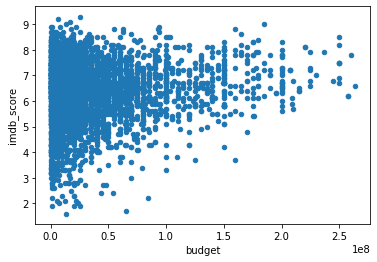

In [32]:
df.plot(kind='scatter', x= 'budget', y='imdb_score')

## 국내 사이트
* 서울열린데이터광장
https://data.seoul.go.kr/

* 공공데이터포털
https://www.data.go.kr

* e-나라지표
http://www.index.go.kr/

* 국가통계포털
http://kosis.kr

* 서울특별시 빅데이터 캠퍼스
https://bigdata.seoul.go.kr/

* 통계청
http://kostat.go.kr/

각 사이트를 보면, 여러 분야의 데이터를 다운로드 받을 수 있습니다.
혹은 원하는 데이터를 신청하면 제공해주기도 합니다.

그 외에도 데이터를 제공하는 여러 해외 사이트들이 있습니다.

## 해외 사이트
* 구글 데이터 검색
https://toolbox.google.com/datasetsearch

* 캐글
https://www.kaggle.com/datasets

* Awesome Public Datasets Github
https://github.com/awesomedata/awesome-public-datasets

* Data and Story Library
https://dasl.datadescription.com/

* 데이터허브
https://datahub.io/

구글 등의 검색 엔진을 활용하면, 더 다양한 데이터를 찾을 수 있습니다.

하지만 데이터에 저작권이 있기도 하니, 실제로 데이터를 활용할 때는 잘 확인하고 사용하셔야 합니다.

## 센서 사용하기

**센서(Sensor)** 물리적인 현상을 감지해서 전기 신호로 변환해주는 장치

나도 센서로 데이터를 수집할 수 있을까?
* 아두이노
* 라즈베리파이
등을 활용하여 간단한 코딩을 수행하면 우리도 데이터를 수집할 수 있다.

## 웹에서 모으기

우리도 서비스를 만들면 데이터를 모을 수 있다.!!
하지만 그건 어렵...ㅠㅠㅜ

공개된 데이터도 상당히 많다.
특히 우리가 보고있는 데이터를 공개된 데이터인 경우가 많다

* 웹 스크래핑(Web Scraping) : 하나의 페이지에서 원하는 정보를 긁어오는 것
* 웹 크롤링(Web Crawling) : 이페이지 저 페이지로 기어다니면서 데이터를 수집해오는것
